## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [85]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [86]:
path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/6-Advanced Analytics and Dashboard Design'

In [87]:
# Import the sustainable energy data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global-data-on-sustainable-energy_clean.csv'), index_col = False)

In [88]:
df.shape

(3648, 19)

In [89]:
df.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
1,1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
2,2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.400000,179.426579,60,652230.0,33.93911,67.709953
3,3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [90]:
#Drop column Unnamed: 0

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [91]:
#Drop column Country as it is not numerical column

df.drop(['Country'], axis = 1, inplace = True)

In [92]:
df.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
1,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
2,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.400000,179.426579,60,652230.0,33.93911,67.709953
3,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [93]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number'])

print(numeric_columns)

      Year  Access to electricity (% of population)  \
0     2000                                 1.613591   
1     2001                                 4.074574   
2     2002                                 9.409158   
3     2003                                14.738506   
4     2004                                20.064968   
...    ...                                      ...   
3643  2016                                42.561730   
3644  2017                                44.178635   
3645  2018                                45.572647   
3646  2019                                46.781475   
3647  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3643                               29.

In [94]:
df_num = df[['Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'Land Area(Km2)', 'Latitude', 'Longitude']]

In [95]:
df_num.head

<bound method NDFrame.head of       Year  Access to electricity (% of population)  \
0     2000                                 1.613591   
1     2001                                 4.074574   
2     2002                                 9.409158   
3     2003                                14.738506   
4     2004                                20.064968   
...    ...                                      ...   
3643  2016                                42.561730   
3644  2017                                44.178635   
3645  2018                                45.572647   
3646  2019                                46.781475   
3647  2020                                52.747670   

      Access to clean fuels for cooking  \
0                                   6.2   
1                                   7.2   
2                                   8.2   
3                                   9.5   
4                                  10.9   
...                                 ...   
3643    

### 2. The elbow technique

In [96]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [97]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

[-1.1099835323694524e+16,
 -2573334762472443.5,
 -1636000765131869.5,
 -702115257114383.4,
 -494268094115260.1,
 -343724601989284.1,
 -270634356419087.7,
 -218180521289604.7,
 -167969345971650.8]

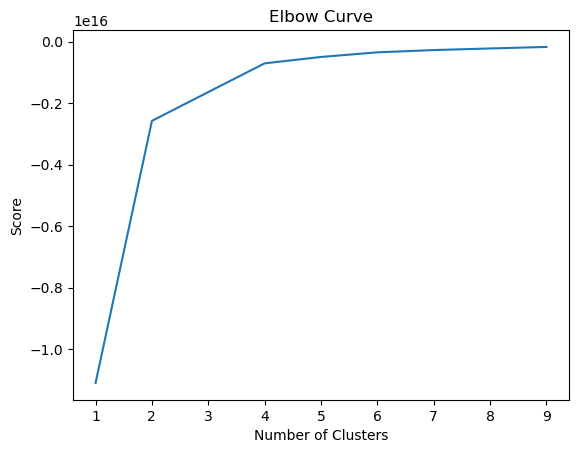

In [98]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### After 4, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [121]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [122]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [123]:
df_num['clusters'] = kmeans.fit_predict(df_num)

/Users/nikolinastekovic/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/p4/0vwc9bn137jd4v8nzv7p6ghw0000gn/T/ipykernel_96742/1773540400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [124]:
df_num.head()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Land Area(Km2),Latitude,Longitude,clusters
0,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,652230.0,33.93911,67.709953,0
1,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,652230.0,33.93911,67.709953,0
2,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,652230.0,33.93911,67.709953,0
3,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,652230.0,33.93911,67.709953,0
4,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,652230.0,33.93911,67.709953,0


In [125]:
df_num['clusters'].value_counts()

clusters
0    3102
2     441
3      66
1      39
Name: count, dtype: int64

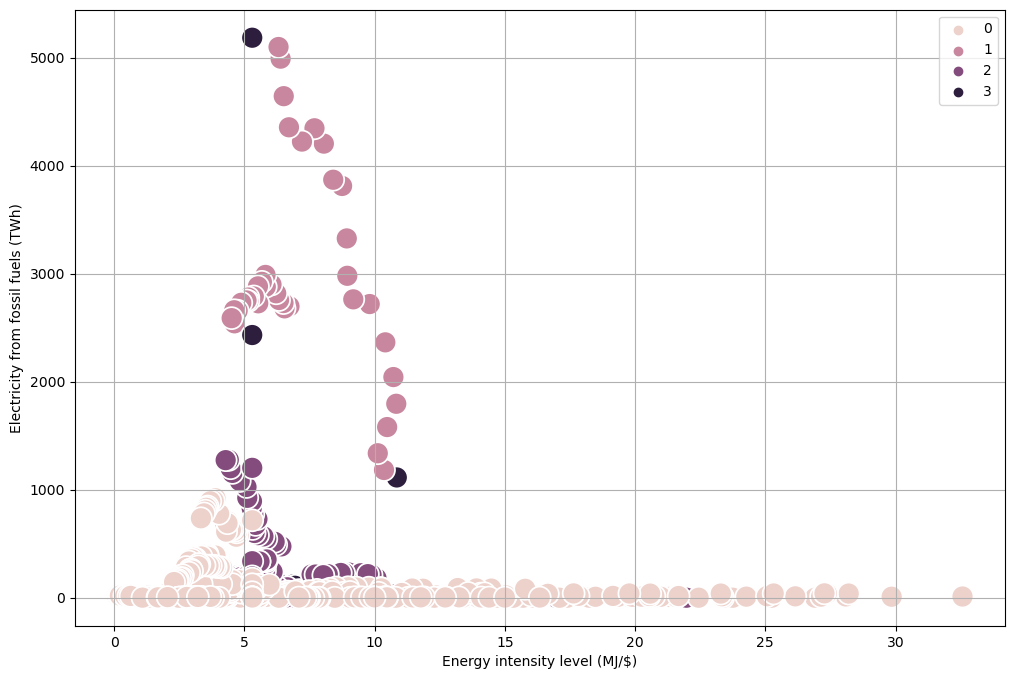

In [150]:
# Plot the clusters for the "Year" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], y=df_num['Electricity from fossil fuels (TWh)'], hue=kmeans.labels_, s=250) 

ax.grid(True) 
plt.xlabel('Energy intensity level (MJ/$)') 
plt.ylabel('Electricity from fossil fuels (TWh)') 
plt.show()

### In the scatterplot above we can notice there is not a lot of high values, cluster 3. Most of the point are in 0 cluster, and they show low score of electricity from fosil fules for all the countries on the scale of Energy intensity level. Cluster 2 and 3 points are in the range of 5 to little over 10 MJ/$ and the represent the whole scale of electricity that has come from fossil fuel

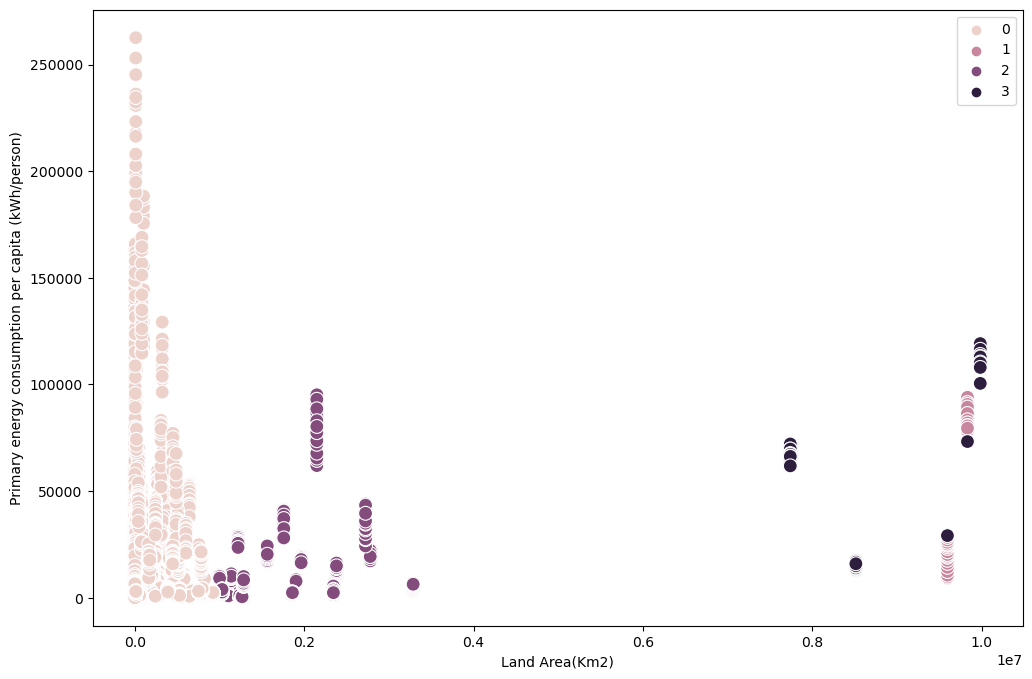

In [130]:
# Plot the clusters for the "Primary energy consumption per capita (kWh/person)" and "Land Area(Km2)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Land Area(Km2)'], y=df_num['Primary energy consumption per capita (kWh/person)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Land Area(Km2)') 
plt.ylabel('Primary energy consumption per capita (kWh/person)') 
plt.show()

### We can notice that the most popular cluster is the first one, in light pink, 0 in the legend. It gathers the data with smallest land area (smallest countries) and primary energy consumtion in all levels of the scale. Second cluster shows values with grater size of the country and low level of primary energy consumption. Mid of the chart there are no values. In the latest cluster we see the points that represent the biggest countries mixed with second biggest also show low level of primary energy consumption.

In [134]:
df_num.loc[df_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'dark pink'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [147]:
df_num.groupby('cluster').agg({'Energy intensity level of primary energy (MJ/$2017 PPP GDP)':['mean', 'median'], 
                         'Access to clean fuels for cooking':['mean', 'median'], 
                         'Primary energy consumption per capita (kWh/person)':['mean', 'median'],
                          'Land Area(Km2)':['mean', 'median']})

Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
                                                                   mean   
cluster                                                                   
dark pink                                             7.093077            
dark purple                                           5.672727            
pink                                                  5.273579            
purple                                                5.328821            

                   Access to clean fuels for cooking          \
            median                              mean  median   
cluster                                                        
dark pink     6.50                         79.246154  100.00   
dark purple   5.30                         96.703030  100.00   
pink          4.37                         63.757366   80.75   
purple        4.79                         53.320748   52.90   

            Primary energy consumption per capita (kWh/person)              \
                                                          mean      median   
cluster                                                                      
dark pink                                         53496.174974  78289.0100   
dark purple                                       64410.094697  68431.0775   
pink                                              26192.120316  13481.4605   
purple                                            14378.056005   7863.6520   

            Land Area(Km2)             
                      mean     median  
cluster                                
dark pink     9.718271e+06  9833517.0  
dark purple   8.789429e+06  8515770.0  
pink          1.880999e+05    83871.0  
purple        1.740050e+06  1564116.0

#### The mean of dark pink cluster has mean of 7 , which is higher than other 3 groups. It also represents the biggest country as in land area.
From these scatterplots there are 2 main questions that would be interesting to look into fruther:
    1. Why is it that energy intensity level scatterplot distribution of pink cluster is so wide, and yet keeps in lowest level of Access to clean fuesl for cooking?
    2. Why is it that countries with largest land area don't have values in low or high Primary energy consumption? It would be expected that countries like USA and China would have users that are both in middle (as they are in the chart) but also very high usage of Primary energy.